In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import os
import plotly.express as px # type: ignore
import cufflinks as cf # type: ignore
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler,MinMaxScaler # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from catboost import Pool, CatBoostClassifier, cv # type: ignore
from xgboost import XGBClassifier # type: ignore
from lightgbm import LGBMClassifier # type: ignore
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, StratifiedKFold, RepeatedStratifiedKFold # type: ignore
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix # type: ignore
from sklearn.metrics import average_precision_score,classification_report # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore
import optuna # type: ignore
import warnings # type: ignore
warnings.filterwarnings("ignore")
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning:

You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.



In [2]:
tdcsfog_003f117e14 = pd.read_csv('C:\Users\Akash R H\OneDrive\Desktop\MINI PROJECT\GAIT')
tdcsfog_003f117e14.head()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0,-9.533939,0.566322,-1.413525,0,0,0
1,1,-9.536140,0.564137,-1.440621,0,0,0
2,2,-9.529345,0.561765,-1.429332,0,0,0
3,3,-9.531239,0.564227,-1.415490,0,0,0
4,4,-9.540825,0.561854,-1.429471,0,0,0


In [3]:
tdcsfog_003f117e14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4682 entries, 0 to 4681
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             4682 non-null   int64  
 1   AccV             4682 non-null   float64
 2   AccML            4682 non-null   float64
 3   AccAP            4682 non-null   float64
 4   StartHesitation  4682 non-null   int64  
 5   Turn             4682 non-null   int64  
 6   Walking          4682 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 256.2 KB


In [4]:
tdcsfog_003f117e14.describe()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
count,4682.00000,4682.000000,4682.000000,4682.000000,4682.0,4682.000000,4682.0
mean,2340.50000,-9.151214,0.753518,2.471637,0.0,0.168304,0.0
std,1351.72131,1.384390,1.102125,2.239906,0.0,0.374176,0.0
min,0.00000,-23.796051,-9.097370,-7.353417,0.0,0.000000,0.0
25%,1170.25000,-9.537719,0.322877,1.966646,0.0,0.000000,0.0
50%,2340.50000,-9.234702,0.580891,3.137857,0.0,0.000000,0.0
75%,3510.75000,-8.470460,1.368355,3.819931,0.0,0.000000,0.0
max,4681.00000,-3.915590,5.996704,10.281080,0.0,1.000000,0.0


In [5]:
defog_02ea782681 = pd.read_csv('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/02ea782681.csv')
defog_02ea782681.head()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-1.0,0.044129,-0.25,0,0,0,False,False
1,1,-1.0,0.034431,-0.25,0,0,0,False,False
2,2,-1.0,0.031250,-0.25,0,0,0,False,False
3,3,-1.0,0.031250,-0.25,0,0,0,False,False
4,4,-1.0,0.031250,-0.25,0,0,0,False,False


In [6]:
defog_02ea782681.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162907 entries, 0 to 162906
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             162907 non-null  int64  
 1   AccV             162907 non-null  float64
 2   AccML            162907 non-null  float64
 3   AccAP            162907 non-null  float64
 4   StartHesitation  162907 non-null  int64  
 5   Turn             162907 non-null  int64  
 6   Walking          162907 non-null  int64  
 7   Valid            162907 non-null  bool   
 8   Task             162907 non-null  bool   
dtypes: bool(2), float64(3), int64(4)
memory usage: 9.0 MB


In [7]:
defog_02ea782681.describe()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
count,162907.000000,162907.000000,162907.000000,162907.000000,162907.0,162907.000000,162907.0
mean,81453.000000,-0.981353,0.032566,-0.187772,0.0,0.000792,0.0
std,47027.344489,0.073798,0.078877,0.189960,0.0,0.028129,0.0
min,0.000000,-2.764595,-1.063250,-1.270626,0.0,0.000000,0.0
25%,40726.500000,-1.000000,0.000000,-0.265625,0.0,0.000000,0.0
50%,81453.000000,-1.000000,0.031250,-0.234468,0.0,0.000000,0.0
75%,122179.500000,-0.968750,0.046875,-0.203125,0.0,0.000000,0.0
max,162906.000000,0.156229,1.501629,0.343750,0.0,1.000000,0.0


In [8]:

tdcsfog_path= '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog'
tdcsfog_list= []

for file_name in os.listdir(tdcsfog_path):
    if file_name.endswith('.csv'):
        file_path= os.path.join(tdcsfog_path,file_name)
        df= pd.read_csv(file_path)
        df['Time']= df['Time']/(len(df)-1) 
        tdcsfog_list.append(df)
     
tdcsfog= pd.concat(tdcsfog_list,axis= 0)
tdcsfog

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0.000000,-9.665890,0.042550,0.184744,0,0,0
1,0.000135,-9.672969,0.049217,0.184644,0,0,0
2,0.000270,-9.670260,0.033620,0.193790,0,0,0
3,0.000405,-9.673356,0.035159,0.184369,0,0,0
4,0.000541,-9.671458,0.043913,0.197814,0,0,0
...,...,...,...,...,...,...,...
5153,0.999224,-9.915920,-0.105897,-1.123455,0,0,0
5154,0.999418,-9.693752,-0.066892,-1.114903,0,0,0
5155,0.999612,-9.548118,-0.098315,-1.112123,0,0,0
5156,0.999806,-9.469803,-0.111004,-1.130814,0,0,0


In [9]:
tdcsfog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7062672 entries, 0 to 5157
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Time             float64
 1   AccV             float64
 2   AccML            float64
 3   AccAP            float64
 4   StartHesitation  int64  
 5   Turn             int64  
 6   Walking          int64  
dtypes: float64(4), int64(3)
memory usage: 431.1 MB


In [10]:
tdcsfog.describe()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
count,7.062672e+06,7.062672e+06,7.062672e+06,7.062672e+06,7.062672e+06,7.062672e+06,7.062672e+06
mean,5.000000e-01,-9.306317e+00,-2.012513e-01,1.808524e+00,4.315506e-02,2.376979e-01,2.942767e-02
std,2.887092e-01,1.080174e+00,1.269525e+00,2.285849e+00,2.032061e-01,4.256731e-01,1.690020e-01
min,0.000000e+00,-3.552112e+01,-2.616440e+01,-4.782964e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.499690e-01,-9.762402e+00,-9.295446e-01,5.672254e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e-01,-9.363524e+00,-1.722245e-01,1.987101e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.500310e-01,-8.776814e+00,5.752114e-01,3.449026e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,2.090695e+01,2.748472e+01,3.033769e+01,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:


def reduce_memory_usage(df):
    
    init_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(init_mem))
    
    for col in df.columns:
        col_type = df[col].dtype.name
        if ((col_type != 'datetime64[ns]') & (col_type != 'category')):
            if (col_type != 'object'):
                c_min = df[col].min()
                c_max = df[col].max()

                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)

                else:
#                     if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                         df[col] = df[col].astype(np.float16)
                    if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        pass
            else:
                df[col] = df[col].astype('category')
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage became: ",mem_usg," MB")
    
    return df

In [12]:
tdcsfog = reduce_memory_usage(tdcsfog)

Memory usage of dataframe is 431.07 MB
Memory usage became:  181.8582000732422  MB


<Axes: >

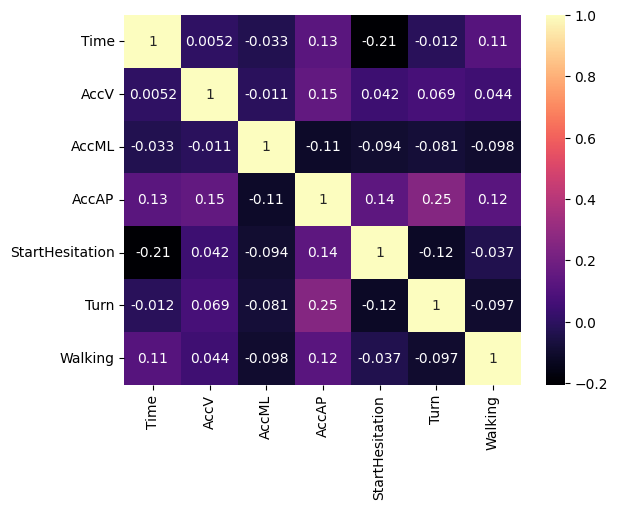

In [13]:
sns.heatmap(tdcsfog.corr(),annot= True,cmap='magma')

<Axes: xlabel='Number of 1s', ylabel='count'>

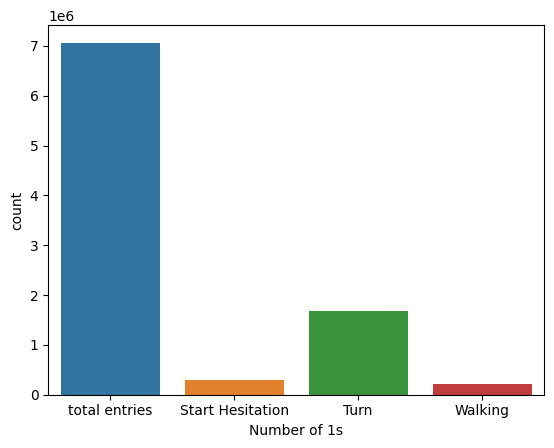

In [14]:
df2= pd.DataFrame(np.concatenate([
    ['total entries'] * len(tdcsfog),
    ['Start Hesitation'] *  int(tdcsfog['StartHesitation'].mean() * len(tdcsfog)),
    ['Turn'] * int(tdcsfog['Turn'].mean() * len(tdcsfog)),
    ['Walking'] * int(tdcsfog['Walking'].mean() * len(tdcsfog))]),
    columns= ['Number of 1s']              
    )

sns.countplot(data= df2, x='Number of 1s')

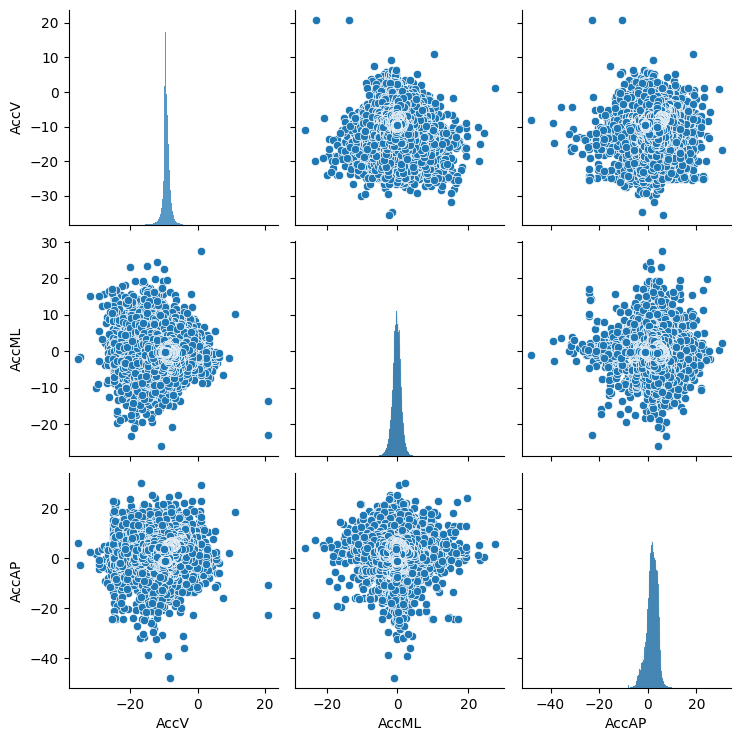

In [15]:
sns.pairplot(tdcsfog[['AccV','AccML','AccAP']])

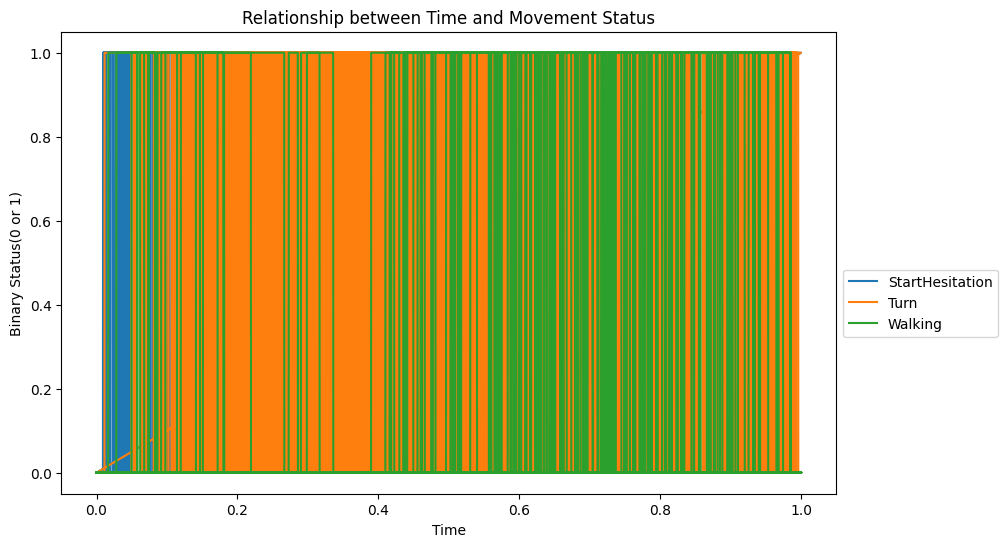

In [16]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.plot(tdcsfog['Time'], tdcsfog['StartHesitation'], label = 'StartHesitation')
ax.plot(tdcsfog['Time'], tdcsfog['Turn'], label = 'Turn')
ax.plot(tdcsfog['Time'], tdcsfog['Walking'], label = 'Walking')

ax.set_xlabel('Time')
ax.set_ylabel('Binary Status(0 or 1)')
ax.set_title('Relationship between Time and Movement Status')

ax.legend(loc='upper left',bbox_to_anchor=(1,0.5))

In [17]:
defog_path = '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog'

defog_list = []

for file_name in os.listdir(defog_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(defog_path, file_name)
        file = pd.read_csv(file_path)
        file.Time = file.Time / (len(file) - 1)
        defog_list.append(file)

defog = pd.concat(defog_list, axis = 0)

defog.head()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0.000000,-1.002697,0.022371,0.068304,0,0,0,False,False
1,0.000008,-1.002641,0.019173,0.066162,0,0,0,False,False
2,0.000017,-0.999820,0.019142,0.067536,0,0,0,False,False
3,0.000025,-0.998023,0.018378,0.068409,0,0,0,False,False
4,0.000034,-0.998359,0.016726,0.066448,0,0,0,False,False


In [18]:
defog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13525702 entries, 0 to 109124
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Time             float64
 1   AccV             float64
 2   AccML            float64
 3   AccAP            float64
 4   StartHesitation  int64  
 5   Turn             int64  
 6   Walking          int64  
 7   Valid            bool   
 8   Task             bool   
dtypes: bool(2), float64(4), int64(3)
memory usage: 851.3 MB


In [19]:
defog= reduce_memory_usage(defog)

Memory usage of dataframe is 851.34 MB
Memory usage became:  451.4690113067627  MB


In [20]:
defog= defog[(defog['Valid']==1) & (defog['Task']==1)]
defog.dropna()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
1000,0.008413,-1.015138,-0.071969,0.161124,0,0,0,1.0,1.0
1001,0.008421,-1.018566,-0.057850,0.144988,0,0,0,1.0,1.0
1002,0.008429,-1.037102,-0.054200,0.129327,0,0,0,1.0,1.0
1003,0.008438,-1.036416,-0.060578,0.115451,0,0,0,1.0,1.0
1004,0.008446,-1.012407,-0.069198,0.110121,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
108120,0.990799,-0.978999,0.043111,-0.392852,0,0,0,1.0,1.0
108121,0.990809,-0.949352,0.016142,-0.362455,0,0,0,1.0,1.0
108122,0.990818,-0.909800,-0.007553,-0.364498,0,0,0,1.0,1.0
108123,0.990827,-0.882329,-0.022470,-0.374119,0,0,0,1.0,1.0


In [21]:
defog= defog.iloc[:,:7]

In [22]:
merged= pd.concat([tdcsfog,defog],axis=0)
merged

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0.000000,-9.665890,0.042550,0.184744,0,0,0
1,0.000135,-9.672969,0.049217,0.184644,0,0,0
2,0.000270,-9.670260,0.033620,0.193790,0,0,0
3,0.000405,-9.673356,0.035159,0.184369,0,0,0
4,0.000541,-9.671457,0.043913,0.197814,0,0,0
...,...,...,...,...,...,...,...
108120,0.990799,-0.978999,0.043111,-0.392852,0,0,0
108121,0.990809,-0.949352,0.016142,-0.362455,0,0,0
108122,0.990818,-0.909800,-0.007553,-0.364498,0,0,0
108123,0.990827,-0.882329,-0.022470,-0.374119,0,0,0


In [23]:
X_merged = merged.iloc[:,0:4]  
X = tdcsfog.iloc[:,0:4]  
y1 = merged['StartHesitation']  
y2 = merged['Turn']  
y3 = tdcsfog['Walking'] 
X_merged.head()

,Time,AccV,AccML,AccAP
0,0.000000,-9.665890,0.042550,0.184744
1,0.000135,-9.672969,0.049217,0.184644
2,0.000270,-9.670260,0.033620,0.193790
3,0.000405,-9.673356,0.035159,0.184369
4,0.000541,-9.671457,0.043913,0.197814


In [24]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: StartHesitation, dtype: int8

**As majority of target variables are 0, we create 3 balanced datasets with equal number of 0s and 1s to get better results.**

In [25]:
y1_ones= np.where(y1==1)[0]

n1_ones= (y1==1).sum()
y1_zeros= np.random.choice(np.where(y1==0)[0],size= n1_ones,replace= False)

y1_balanced_idx= np.sort(np.concatenate([y1_zeros,y1_ones]))
y1_balanced_idx

array([      80,      113,      114, ..., 11153043, 11153132, 11153180])

In [26]:
X1_balanced= X_merged.iloc[y1_balanced_idx,:]
y1_balanced= y1.iloc[y1_balanced_idx]

In [27]:
X1_balanced.shape

(610580, 4)

In [28]:
y2_ones= np.where(y2==1)[0]

n2_ones= (y2==1).sum()
y2_zeros= np.random.choice(np.where(y2==0)[0],size= n2_ones,replace= False)

y2_balanced_idx= np.sort(np.concatenate([y2_zeros,y2_ones]))

X2_balanced= X_merged.iloc[y2_balanced_idx,:]
y2_balanced= y2.iloc[y2_balanced_idx]

In [29]:
y3_ones= np.where(y3==1)[0]

n3_ones= (y3==1).sum()
y3_zeros= np.random.choice(np.where(y3==0)[0],size= n3_ones,replace= False)

y3_balanced_idx= np.sort(np.concatenate([y3_zeros,y3_ones]))

X3_balanced= X.iloc[y3_balanced_idx,:]
y3_balanced= y3.iloc[y3_balanced_idx]

In [30]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_balanced, y1_balanced, test_size = 0.2, random_state = 42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_balanced, y2_balanced, test_size = 0.2, random_state = 42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_balanced, y3_balanced, test_size = 0.2, random_state = 42)

In [31]:
scaler1 = MinMaxScaler()
X1_train = scaler1.fit_transform(X1_train)
X1_test = scaler1.transform(X1_test)

scaler2 = MinMaxScaler()
X2_train = scaler2.fit_transform(X2_train)
X2_test = scaler2.transform(X2_test)

scaler3 = MinMaxScaler()
X3_train = scaler3.fit_transform(X3_train)
X3_test = scaler3.transform(X3_test)

In [32]:
model1 = LogisticRegression()
model2 = LogisticRegression()
model3 = LogisticRegression()


In [33]:
model1.fit(X1_train,y1_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

LogisticRegression()

In [34]:
y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)
y3_pred = model3.predict(X3_test)

In [35]:
print('Start Hesitation \n',classification_report(y1_test,y1_pred))
print('Turn \n',classification_report(y2_test,y2_pred))
print('Walking \n',classification_report(y3_test,y3_pred))

Start Hesitation 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83     61262
           1       0.82      0.87      0.84     60854

    accuracy                           0.84    122116
   macro avg       0.84      0.84      0.84    122116
weighted avg       0.84      0.84      0.84    122116

Turn 
               precision    recall  f1-score   support

           0       0.59      0.68      0.63    452791
           1       0.63      0.53      0.57    453454

    accuracy                           0.61    906245
   macro avg       0.61      0.61      0.60    906245
weighted avg       0.61      0.61      0.60    906245

Walking 
               precision    recall  f1-score   support

           0       0.76      0.72      0.74     41371
           1       0.74      0.77      0.75     41765

    accuracy                           0.74     83136
   macro avg       0.75      0.74      0.74     83136
weighted avg       0.75      0.74     

In [36]:
sh = confusion_matrix(y1_test,y1_pred)
tu = confusion_matrix(y2_test,y2_pred)
wa = confusion_matrix(y3_test,y3_pred)


<Axes: title={'center': 'Start Hesitation'}>

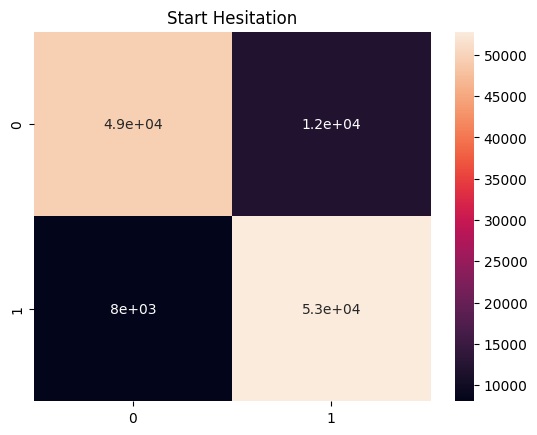

In [37]:
plt.title('Start Hesitation')
sns.heatmap(sh,annot=True)

<Axes: title={'center': 'Turn'}>

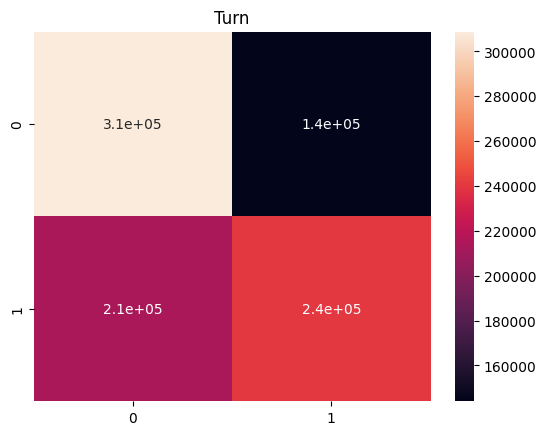

In [38]:
plt.title('Turn')
sns.heatmap(tu,annot=True)

<Axes: title={'center': 'Walikng'}>

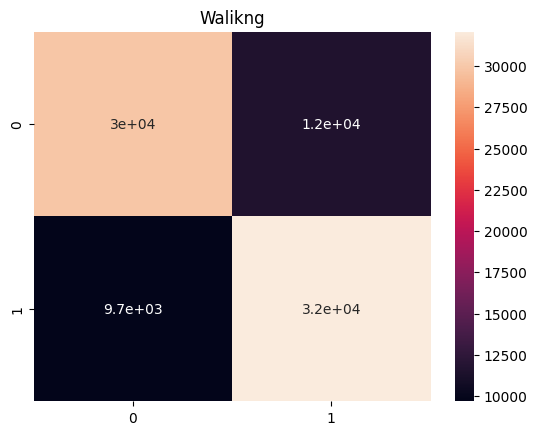

In [39]:
plt.title('Walikng')
sns.heatmap(wa,annot=True)

In [40]:
seed = np.random.seed(6)

In [41]:
train1_dataset = Pool(data=X1_train,label=y1_train)
eval1_dataset = Pool(data=X1_test,label=y1_test)
catmodel = CatBoostClassifier(iterations=1000,verbose=100, od_type="Iter",eval_metric="PRAUC", random_seed=seed, early_stopping_rounds=100)
catmodel.fit(train1_dataset, use_best_model=True, eval_set=eval1_dataset);

Learning rate set to 0.146235
0:	learn: 0.9270912	test: 0.9268202	best: 0.9268202 (0)	total: 133ms	remaining: 2m 13s
100:	learn: 0.9571366	test: 0.9570848	best: 0.9570848 (100)	total: 10.3s	remaining: 1m 31s
200:	learn: 0.9606634	test: 0.9603015	best: 0.9603015 (200)	total: 21.5s	remaining: 1m 25s
300:	learn: 0.9626769	test: 0.9619468	best: 0.9619468 (300)	total: 32.3s	remaining: 1m 15s
400:	learn: 0.9639970	test: 0.9629979	best: 0.9629979 (400)	total: 43.1s	remaining: 1m 4s
500:	learn: 0.9650771	test: 0.9637313	best: 0.9637313 (500)	total: 54.3s	remaining: 54.1s
600:	learn: 0.9659734	test: 0.9642917	best: 0.9642917 (600)	total: 1m 5s	remaining: 43.2s
700:	learn: 0.9667074	test: 0.9646985	best: 0.9646985 (700)	total: 1m 15s	remaining: 32.3s
800:	learn: 0.9674858	test: 0.9651465	best: 0.9651467 (798)	total: 1m 27s	remaining: 21.6s
900:	learn: 0.9681452	test: 0.9654321	best: 0.9654321 (900)	total: 1m 37s	remaining: 10.8s
999:	learn: 0.9687039	test: 0.9656357	best: 0.9656357 (999)	total: 

In [42]:
train2_dataset = Pool(data=X2_train,label=y2_train)
eval2_dataset = Pool(data=X2_test,label=y2_test)
catmodel = CatBoostClassifier(iterations=1000,verbose=100, od_type="Iter",eval_metric="PRAUC", random_seed=seed, early_stopping_rounds=100)
catmodel.fit(train2_dataset, use_best_model=True, eval_set=eval2_dataset);

Learning rate set to 0.239915
0:	learn: 0.7190598	test: 0.7241133	best: 0.7241133 (0)	total: 621ms	remaining: 10m 20s
100:	learn: 0.8167401	test: 0.8165489	best: 0.8165489 (100)	total: 1m 20s	remaining: 12m
200:	learn: 0.8269261	test: 0.8265524	best: 0.8265524 (200)	total: 2m 47s	remaining: 11m 4s
300:	learn: 0.8323536	test: 0.8318286	best: 0.8318286 (300)	total: 4m 13s	remaining: 9m 48s
400:	learn: 0.8359354	test: 0.8352207	best: 0.8352207 (400)	total: 5m 39s	remaining: 8m 26s
500:	learn: 0.8388537	test: 0.8379624	best: 0.8379624 (500)	total: 7m 5s	remaining: 7m 4s
600:	learn: 0.8413217	test: 0.8402369	best: 0.8402369 (600)	total: 8m 32s	remaining: 5m 39s
700:	learn: 0.8432749	test: 0.8420468	best: 0.8420468 (700)	total: 9m 58s	remaining: 4m 15s
800:	learn: 0.8450586	test: 0.8436479	best: 0.8436479 (800)	total: 11m 24s	remaining: 2m 50s
900:	learn: 0.8464298	test: 0.8448743	best: 0.8448743 (900)	total: 12m 51s	remaining: 1m 24s
999:	learn: 0.8477105	test: 0.8459778	best: 0.8459778 (99

In [43]:
train3_dataset = Pool(data=X3_train,label=y3_train)
eval3_dataset = Pool(data=X3_test,label=y3_test)
catmodel = CatBoostClassifier(iterations=1000,verbose=100, od_type="Iter",eval_metric="PRAUC", random_seed=seed, early_stopping_rounds=100)
catmodel.fit(train3_dataset, use_best_model=True, eval_set=eval3_dataset);

Learning rate set to 0.132986
0:	learn: 0.8222722	test: 0.8264428	best: 0.8264428 (0)	total: 50.3ms	remaining: 50.2s
100:	learn: 0.8777937	test: 0.8806106	best: 0.8806106 (100)	total: 7.55s	remaining: 1m 7s
200:	learn: 0.8867439	test: 0.8882973	best: 0.8882973 (200)	total: 15s	remaining: 59.5s
300:	learn: 0.8916631	test: 0.8920933	best: 0.8920933 (300)	total: 22.5s	remaining: 52.1s
400:	learn: 0.8949186	test: 0.8943703	best: 0.8943703 (400)	total: 30.1s	remaining: 44.9s
500:	learn: 0.8975988	test: 0.8961020	best: 0.8961020 (500)	total: 37.8s	remaining: 37.6s
600:	learn: 0.8998562	test: 0.8974552	best: 0.8974552 (600)	total: 45.3s	remaining: 30.1s
700:	learn: 0.9017930	test: 0.8983788	best: 0.8983788 (700)	total: 52.8s	remaining: 22.5s
800:	learn: 0.9036329	test: 0.8994287	best: 0.8994287 (800)	total: 1m	remaining: 15s
900:	learn: 0.9051386	test: 0.9000620	best: 0.9000635 (898)	total: 1m 8s	remaining: 7.49s
999:	learn: 0.9065243	test: 0.9005563	best: 0.9005563 (999)	total: 1m 15s	remain

In [44]:
SPLITS = 6
cat1_auc_score = []
CAT1_MODELS = []

for i,(tr,val) in enumerate(StratifiedKFold(n_splits=SPLITS,random_state=seed).split(X1_balanced,y1_balanced)):
    
    print("-"*30,f"FOLD {i+1}/{SPLITS}","-"*30)

    train_dataset1 = Pool(data=X1_balanced.iloc[tr,:],label=y1_balanced.iloc[tr])
    eval_dataset1 = Pool(data=X1_balanced.iloc[val,:],label=y1_balanced.iloc[val])
    
    catmodel = CatBoostClassifier(iterations=10000,verbose=1000,
                                  od_type="Iter",eval_metric="PRAUC",
                                  random_seed=seed,early_stopping_rounds=1000)
    catmodel.fit(train_dataset1, use_best_model=True, eval_set=eval_dataset1)
    CAT1_MODELS.append(catmodel)
    
    auc = roc_auc_score(y1_balanced.iloc[val], catmodel.predict_proba(X1_balanced.iloc[val,:])[:,1])
    cat1_auc_score.append(auc)

    


------------------------------ FOLD 1/6 ------------------------------
Learning rate set to 0.054254
0:	learn: 0.9366390	test: 0.8484960	best: 0.8484960 (0)	total: 61.3ms	remaining: 10m 12s
1000:	learn: 0.9677513	test: 0.8726713	best: 0.8818818 (137)	total: 1m 40s	remaining: 15m 5s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.88188185
bestIteration = 137

Shrink model to first 138 iterations.
------------------------------ FOLD 2/6 ------------------------------
Learning rate set to 0.054254
0:	learn: 0.9336521	test: 0.8765241	best: 0.8765241 (0)	total: 66.8ms	remaining: 11m 8s
1000:	learn: 0.9690515	test: 0.8889987	best: 0.9021842 (139)	total: 1m 41s	remaining: 15m 14s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.9021842106
bestIteration = 139

Shrink model to first 140 iterations.
------------------------------ FOLD 3/6 ------------------------------
Learning rate set to 0.054254
0:	learn: 0.9389164	test: 0.8228278	best: 0.8228278 (0)

In [45]:

print("CV score of CAT is ",np.array(cat1_auc_score).mean())

CV score of CAT is  0.9292305110863741
